In [1]:
% load_ext autoreload
% autoreload 2
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')

from experiments.config.config_general import DATASETS
from experiments.notebooks import viz
from experiments.util import get_comparison_result

np.random.seed(0)

/accounts/projects/binyu/keyan3/imodels/experiments/notebooks


# dataset stats

In [2]:
metadata = []
columns = ['name', 'samples', 'orig_features', 'features', 'class 0 ct', 'class 1 ct', 'majority class %']
orig_features = [12, 20, 3, 13, 10, 23, 91, 36]
for i, (dataset_name, path) in enumerate(DATASETS):
    X, y, feature_names = get_clean_dataset(path=path)
    shape = X.shape
    class_counts = np.unique(y, return_counts=True)[1]
    metadata.append([dataset_name, shape[0], orig_features[i], shape[1], class_counts[0], class_counts[1],
                     np.max(class_counts) / np.sum(class_counts)])
pd.DataFrame(metadata, columns=columns).set_index('name')

,samples,orig_features,features,class 0 ct,class 1 ct,majority class %
name,,,,,,
recidivism,6172,12,20,3182,2990,0.515554
credit,30000,20,33,23364,6636,0.778800
juvenile,3640,3,286,3153,487,0.866209
readmission,101763,13,150,54861,46902,0.539106
breast-cancer,277,10,17,196,81,0.707581
credit-g,1000,23,61,300,700,0.700000
haberman,306,91,3,81,225,0.735294
heart,270,36,15,150,120,0.555556


- Recreate original background gradient analysis from cache 

# complexity vs. test performance plots

In [3]:
baselines = [
    'random_forest',
    'gradient_boosting',
    'skope_rules',
    'rulefit',
    'brs',
    'brl'
]

## readmission

In [4]:
metric = 'mean_avg_precision'
ensembles = [
    #     'stbl_l2_mm0',
    #     'stbl_l2_mm1',
    'stbl_l1_mm0',
    #     'stbl_l1_mm1',
    'stbl_l1_mm2'
]
test_models = baselines + ensembles

In [5]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='readmission',
                          prefix='test') for mname in test_models
]

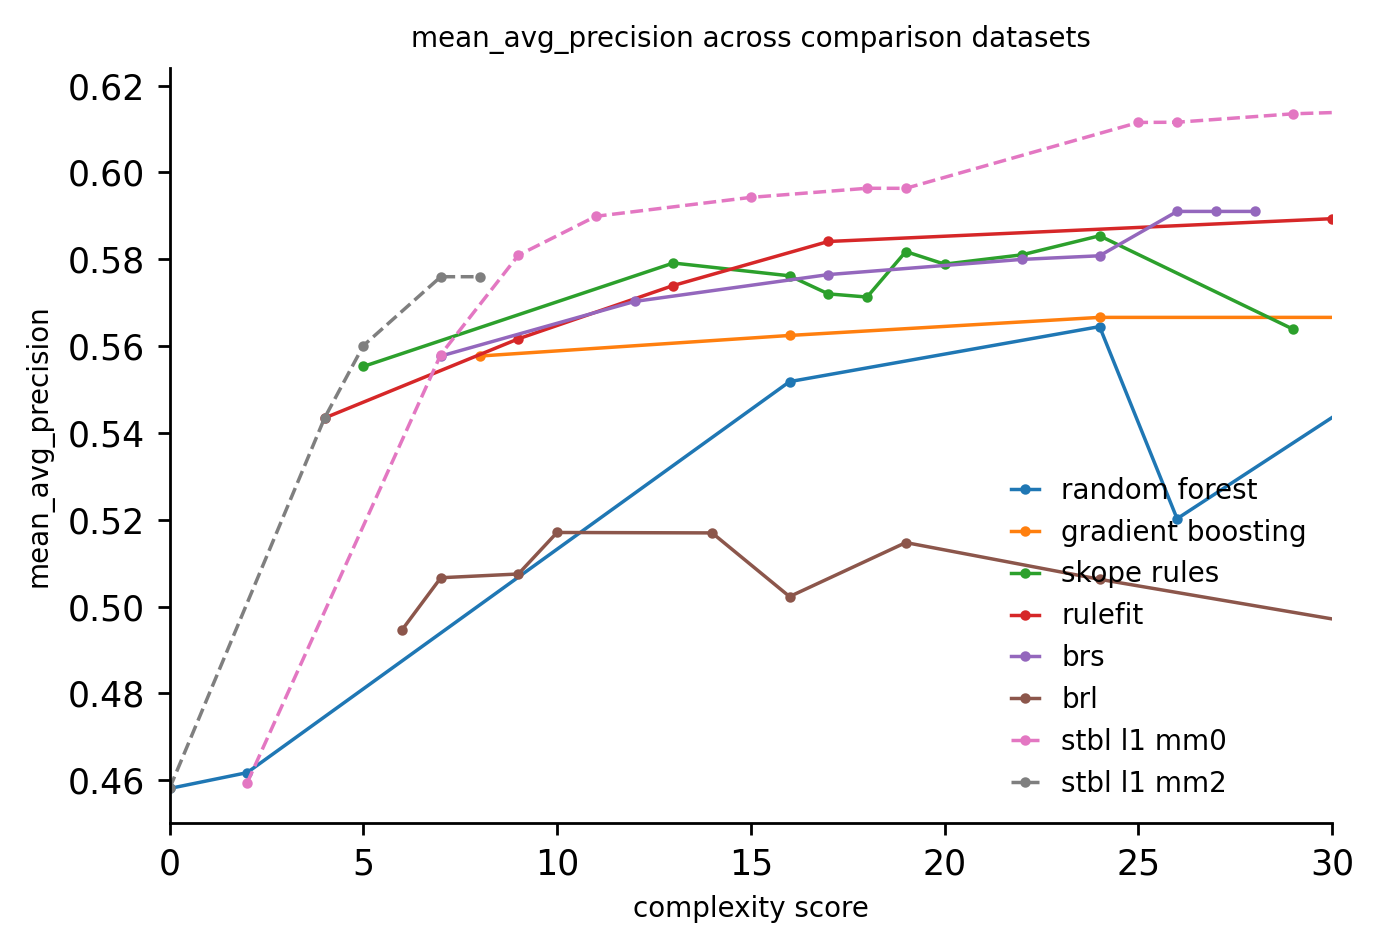

In [6]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## credit

In [7]:
metric = 'mean_avg_precision'
ensembles = [
    #     'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1',
]
test_models = baselines + ensembles

In [8]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='credit',
                          prefix='test') for mname in test_models
]

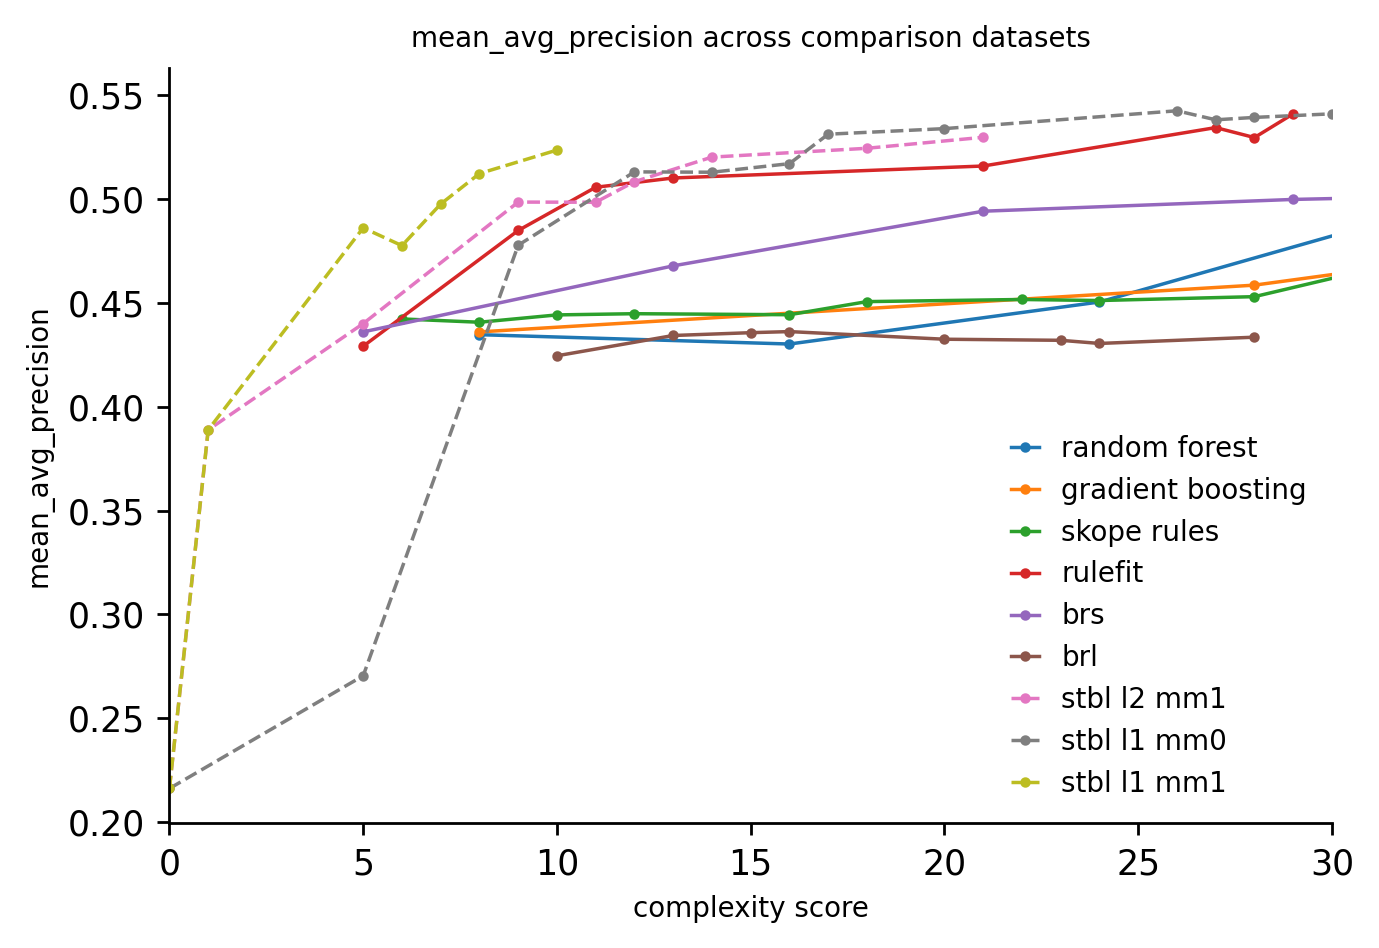

In [9]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## recidivism

In [10]:
metric = 'mean_rocauc'
ensembles = [
    #     'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1',
    #     'stbl_l1_mm2'
]
test_models = baselines + ensembles

In [11]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='recidivism',
                          prefix='test') for mname in test_models
]

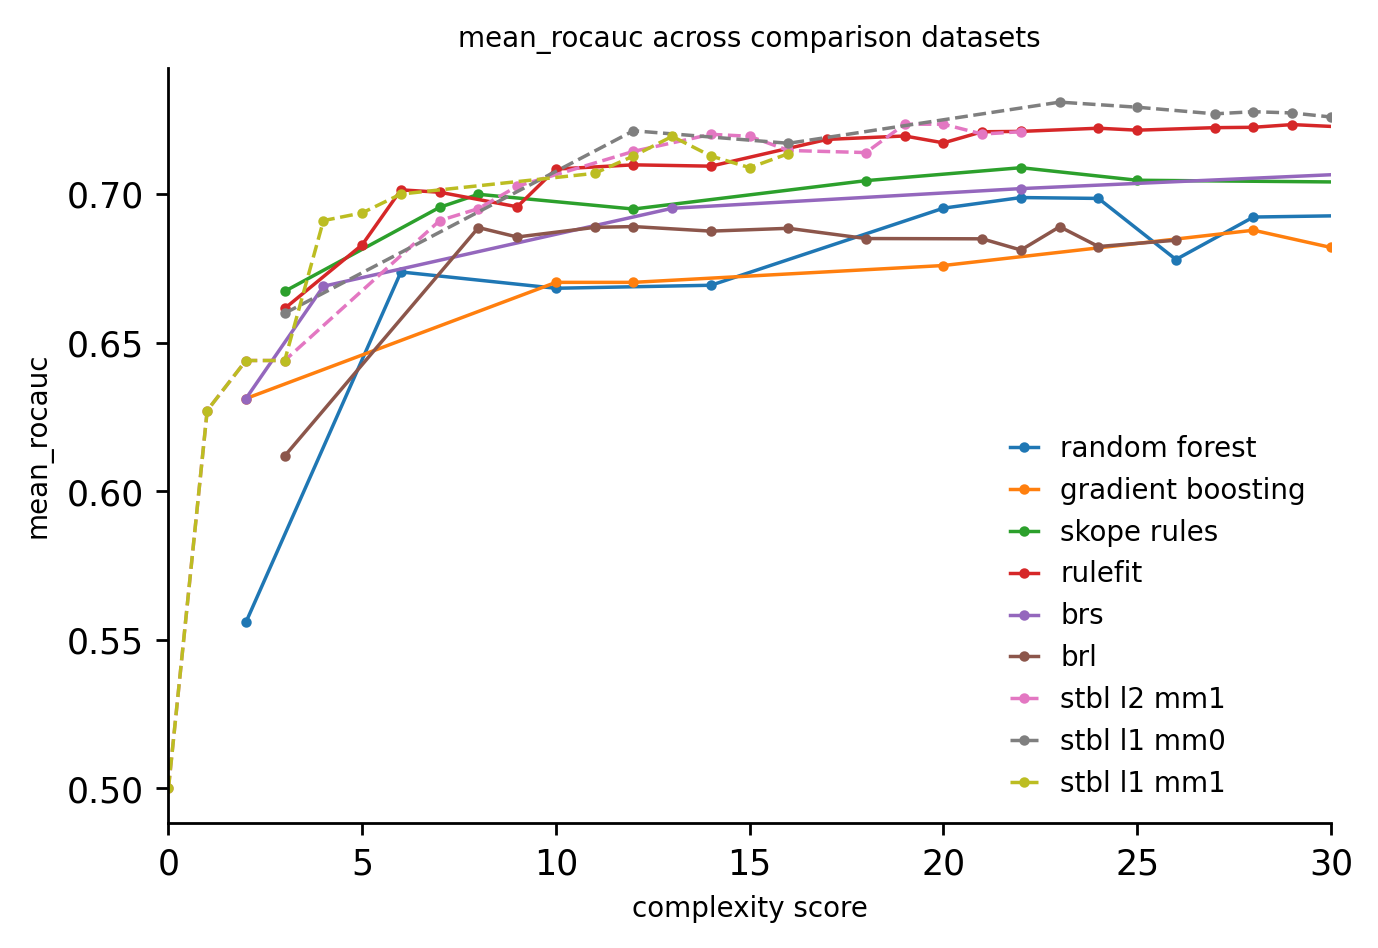

In [12]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## juvenile

In [13]:
metric = 'mean_avg_precision'
ensembles = [
    #     'stbl_l2_mm0',
    'stbl_l2_mm1',
    #     'stbl_l1_mm0',
    'stbl_l1_mm1'
]
test_models = baselines + ensembles

In [14]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='juvenile',
                          prefix='test') for mname in test_models
]

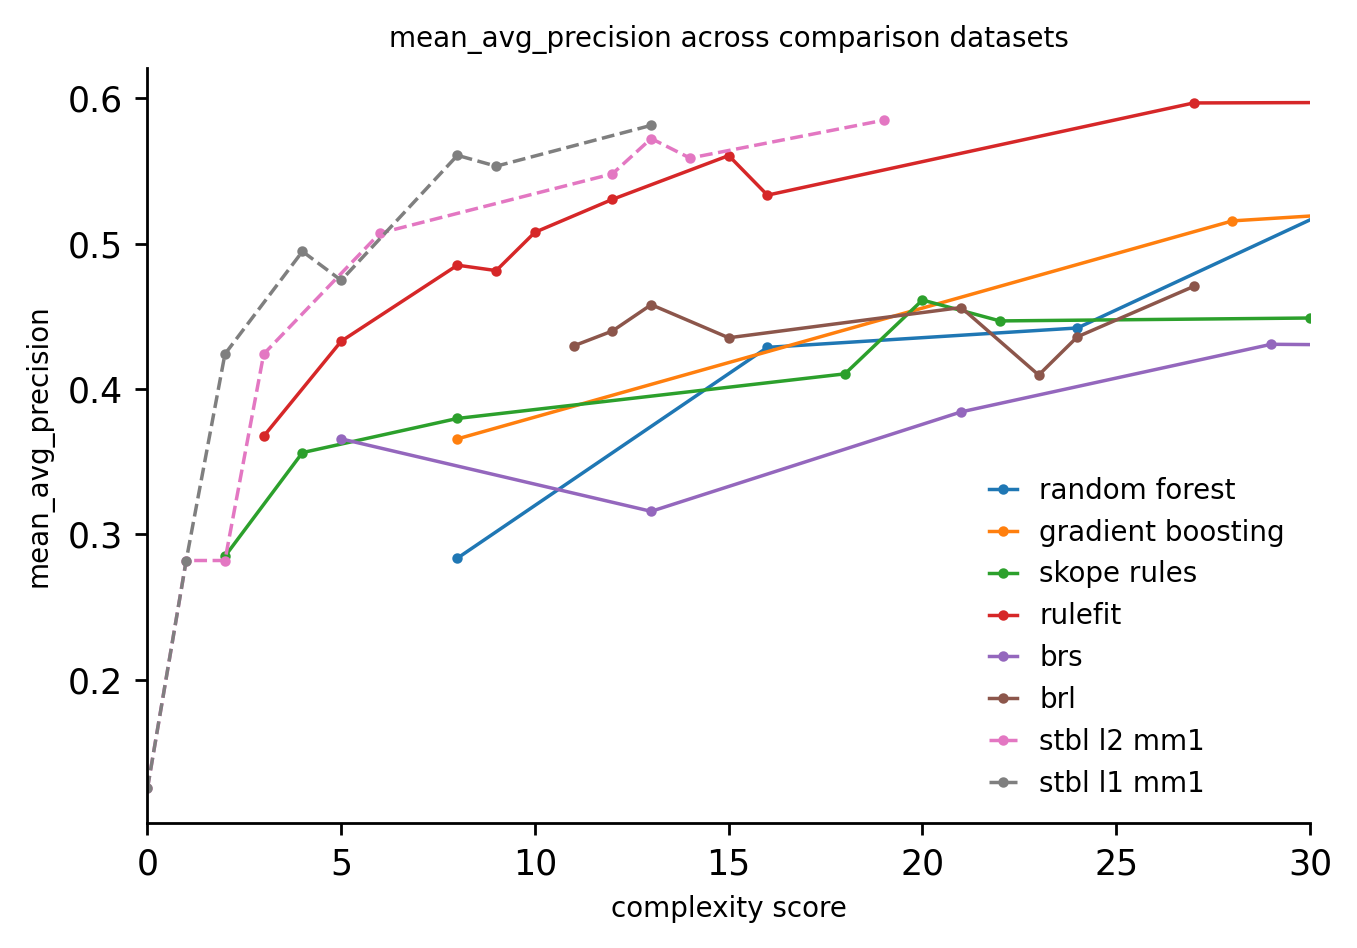

In [15]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

# best metric under limit

In [16]:
from collections import defaultdict


def best_metric_under_limit(c, models, datasets, metric, low_data=False):
    acc_dict = defaultdict(lambda: [])
    for dataset in datasets:
        for model in models:
            result_df = get_comparison_result(MODEL_COMPARISON_PATH, model, dataset, 'test', low_data)['df']
            result_df_under_c = result_df[result_df['mean_complexity'] < c]
            acc_dict[dataset].append(result_df_under_c[f'mean_{metric}'].max())
    return pd.DataFrame(acc_dict, index=models)

In [17]:
ensembles = [
    #     'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1'
]
datasets = ['recidivism', 'readmission', 'credit', 'juvenile']

acc_df = best_metric_under_limit(15, baselines + ensembles, datasets, 'best_accuracy')
# acc_df.style.background_gradient()
acc_df.style.highlight_max()

,recidivism,readmission,credit,juvenile
random_forest,0.641296,0.541886,0.829833,0.875000
gradient_boosting,0.648583,0.615438,0.829500,0.875000
skope_rules,0.664777,0.618975,0.830333,0.899725
rulefit,0.678543,0.616961,0.829500,0.896978
brs,0.651822,0.619859,0.829500,0.875000
brl,0.659109,0.576082,0.809667,0.898352
stbl_l2_mm1,0.672874,0.615487,0.829667,0.906593
stbl_l1_mm0,0.680162,0.619859,0.830667,0.899725
stbl_l1_mm1,0.672874,0.621628,0.830167,0.905220


In [18]:
pr_df = best_metric_under_limit(15, baselines + ensembles, datasets, 'avg_precision')
# pr_df.style.background_gradient()
pr_df.style.highlight_max()

,recidivism,readmission,credit,juvenile
random_forest,0.621291,0.461760,0.434717,0.283527
gradient_boosting,0.600998,0.557700,0.436057,0.365590
skope_rules,0.648514,0.579124,0.444819,0.379648
rulefit,0.678958,0.573944,0.510176,0.530424
brs,0.657477,0.570271,0.467858,0.365590
brl,0.648261,0.517070,0.434322,0.457941
stbl_l2_mm1,0.689018,0.563839,0.520231,0.572287
stbl_l1_mm0,0.687669,0.589881,0.513125,0.527428
stbl_l1_mm1,0.695365,0.595212,0.523614,0.581355


In [19]:
roc_df = best_metric_under_limit(15, baselines + ensembles, datasets, 'rocauc')
# roc_df.style.background_gradient()
roc_df.style.highlight_max()

,recidivism,readmission,credit,juvenile
random_forest,0.673905,0.507283,0.692291,0.744458
gradient_boosting,0.670408,0.629353,0.694629,0.805579
skope_rules,0.700057,0.642448,0.695357,0.689090
rulefit,0.709975,0.639104,0.753825,0.862473
brs,0.695347,0.636796,0.736012,0.820303
brl,0.690220,0.573176,0.715806,0.827781
stbl_l2_mm1,0.720253,0.630727,0.745093,0.867614
stbl_l1_mm0,0.721449,0.645161,0.741724,0.864777
stbl_l1_mm1,0.719554,0.648761,0.744134,0.876809


# low data

## readmission

In [20]:
metric = 'mean_avg_precision'
ensembles = [
    'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1',
    'stbl_l1_mm2'
]
test_models = baselines + ensembles

In [21]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='readmission',
                          prefix='test',
                          low_data=True) for mname in test_models
]

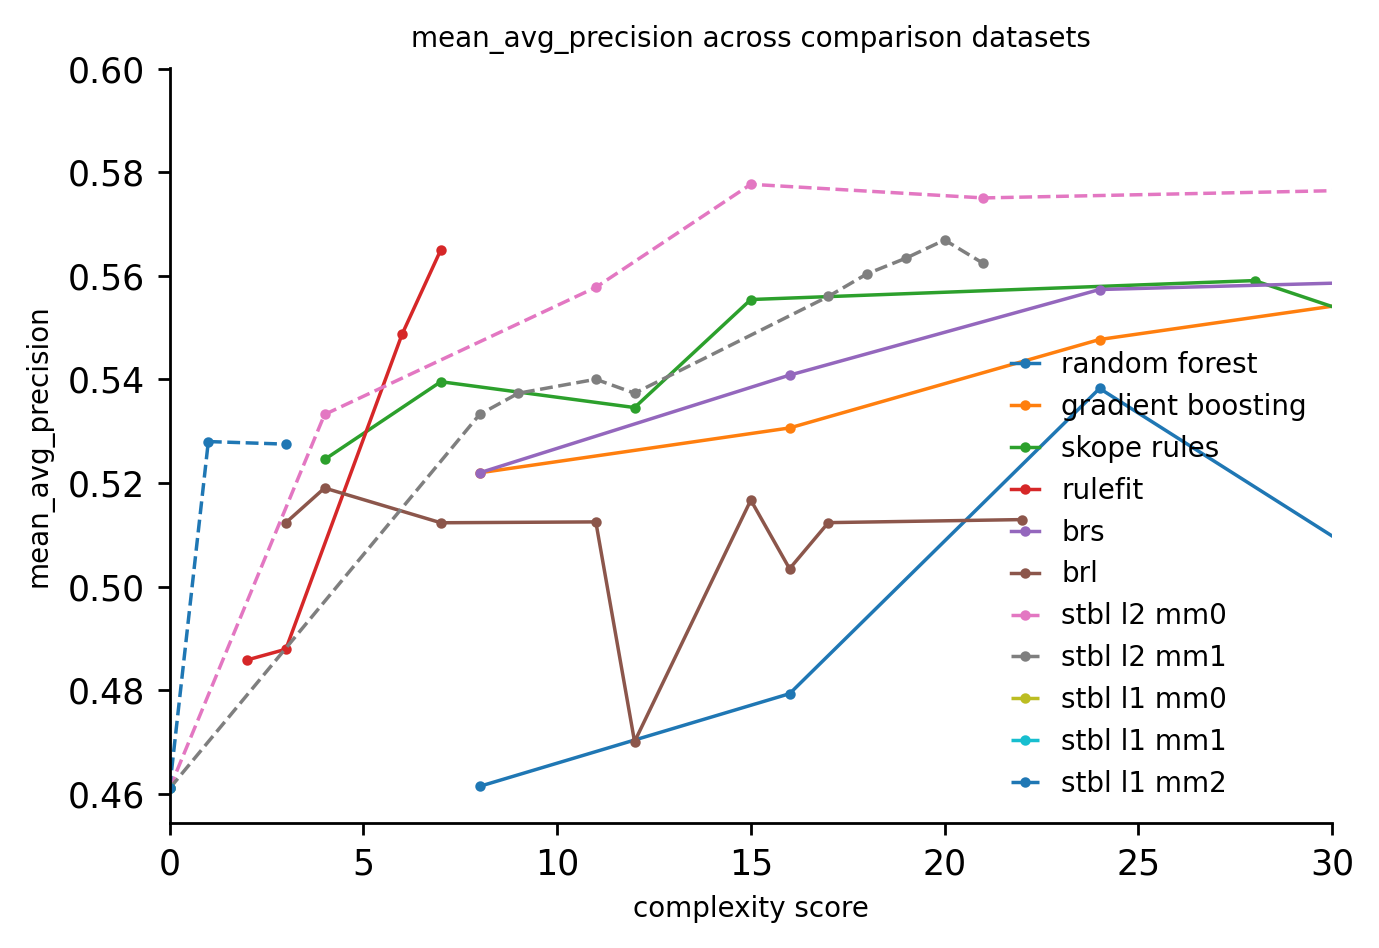

In [22]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## credit

In [23]:
metric = 'mean_avg_precision'
ensembles = [
    'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1'
]
test_models = baselines + ensembles

In [24]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='credit',
                          prefix='test',
                          low_data=True) for mname in test_models
]

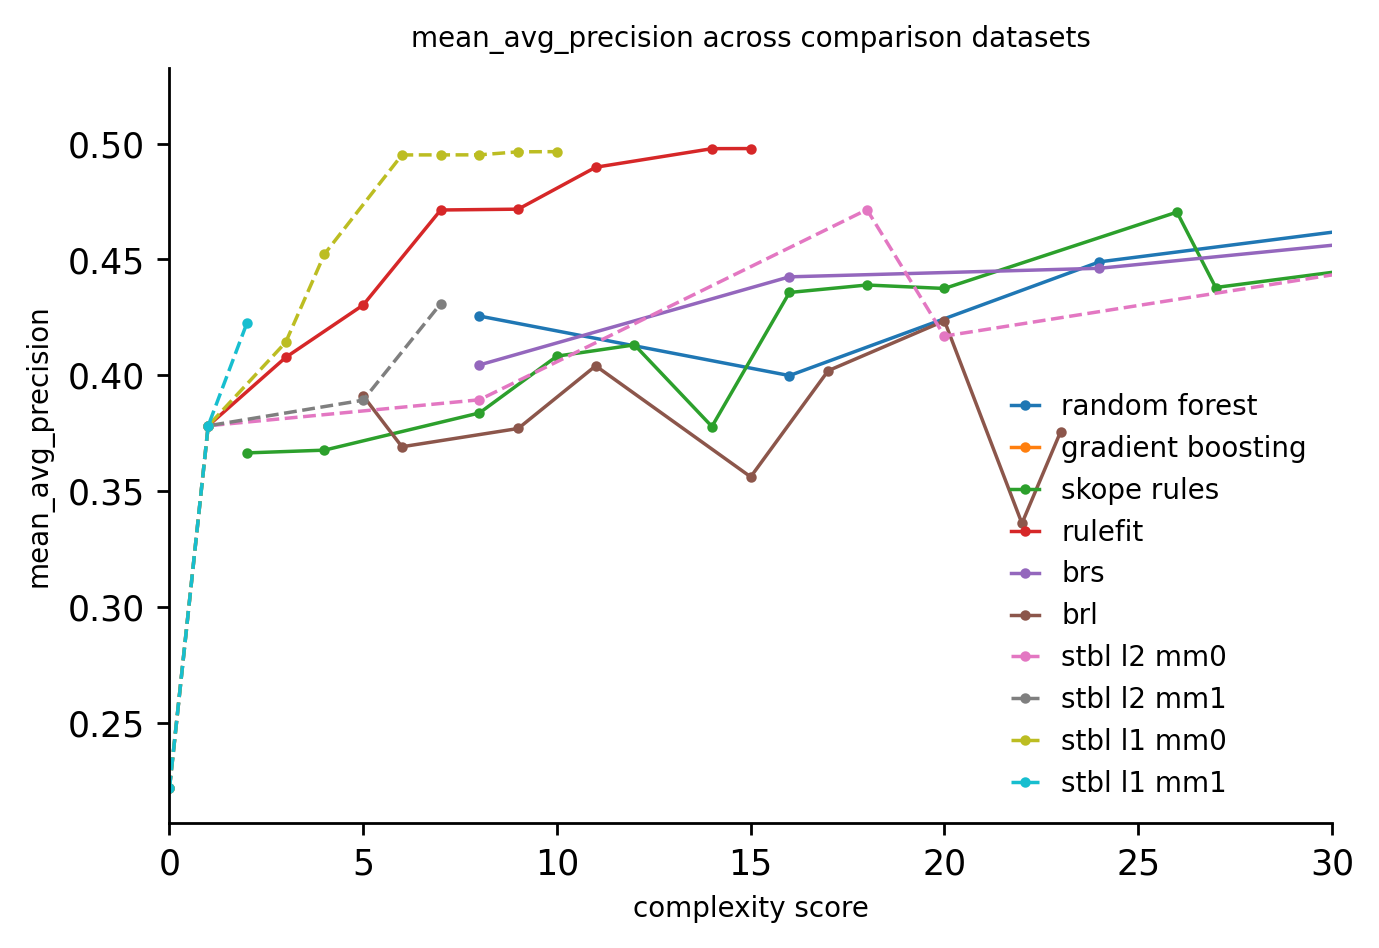

In [25]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## recidivism

In [26]:
metric = 'mean_avg_precision'
ensembles = [
    'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1',
    'stbl_l1_mm2'
]
test_models = baselines + ensembles

In [27]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='recidivism',
                          prefix='test',
                          low_data=True) for mname in test_models
]

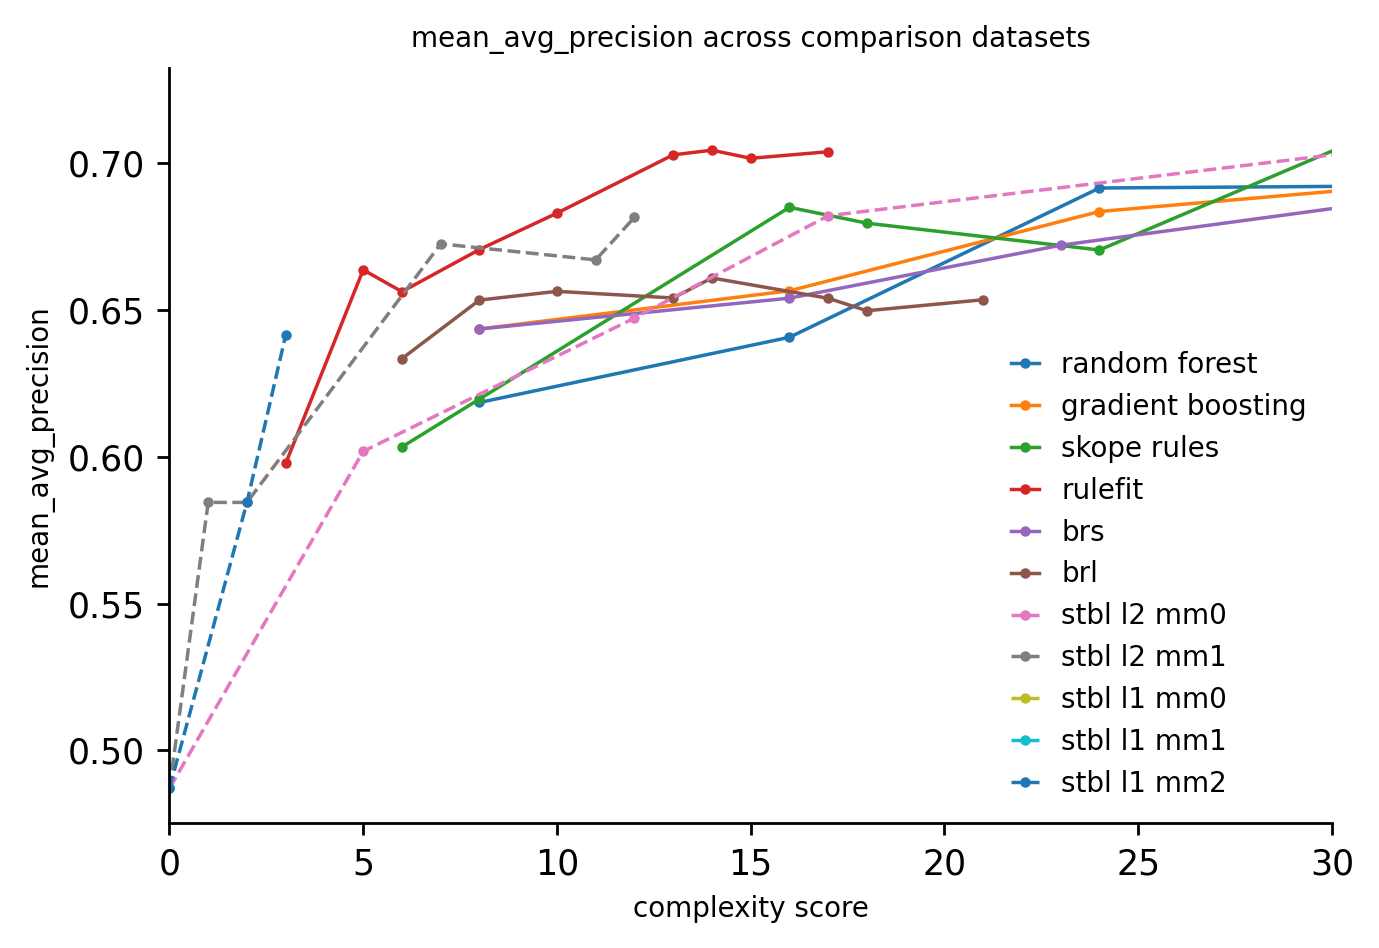

In [28]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

## juvenile

In [29]:
metric = 'mean_avg_precision'
ensembles = [
    'stbl_l2_mm0',
    'stbl_l2_mm1',
    'stbl_l1_mm0',
    'stbl_l1_mm1'
]
test_models = baselines + ensembles

In [30]:
test_results = [
    get_comparison_result(MODEL_COMPARISON_PATH,
                          mname,
                          dataset='juvenile',
                          prefix='test',
                          low_data=True) for mname in test_models
]

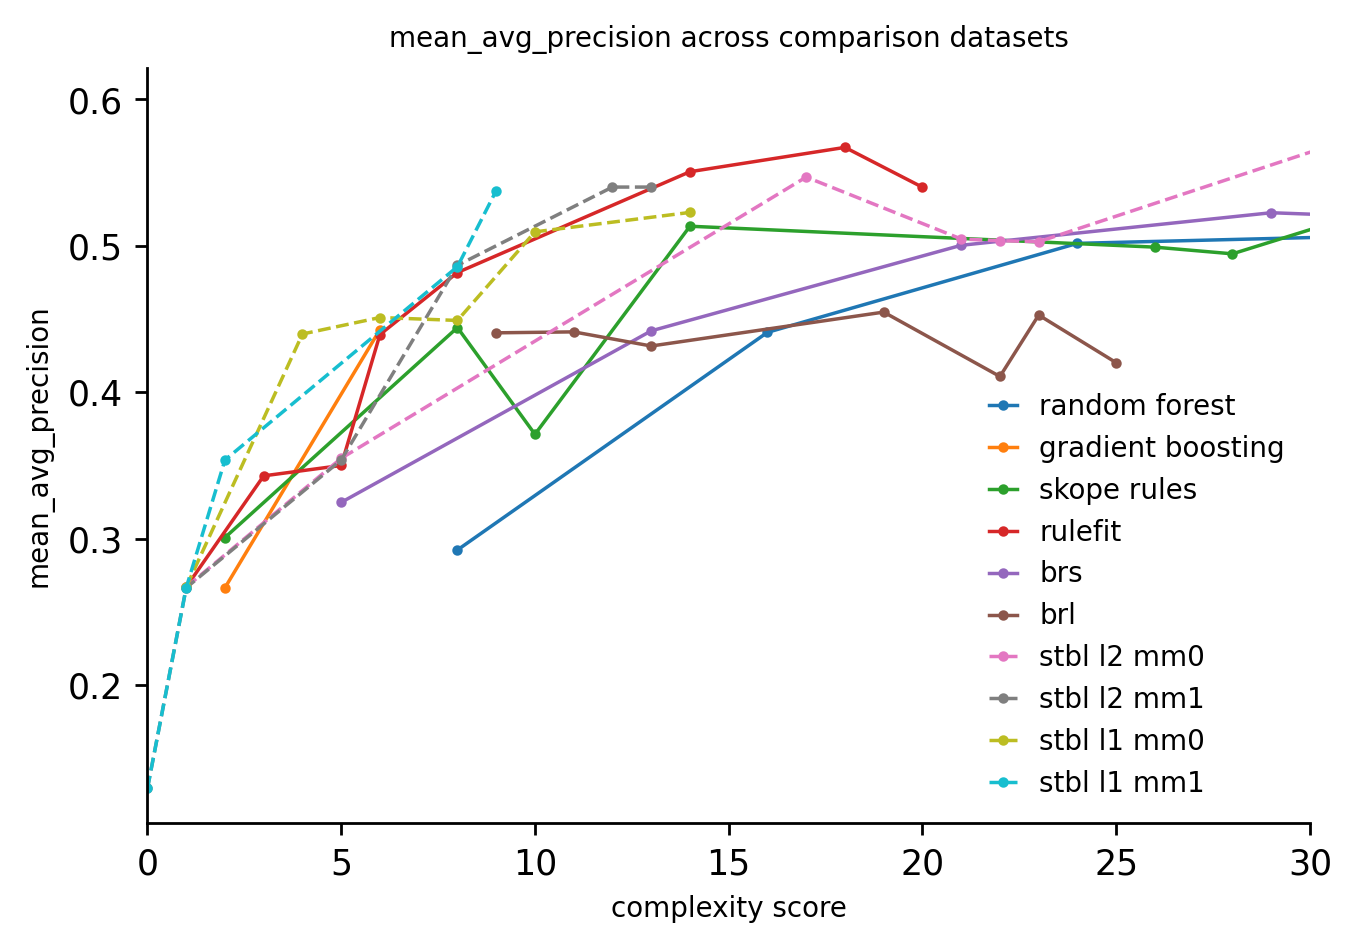

In [31]:
viz.viz_comparison_test_average(test_results, metric=metric)
plt.xlim((0, 30))
# viz.savefig(f'test_hard_{metric}.pdf')
plt.show()

In [32]:
# x, y, feat_names = get_clean_dataset('experiments/data/ICPSR_03986/DS0001/data_clean.csv')
# xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

# mlp_accs = []
# mlp_rocaucs = []
# for hidden_layer_sizes in [(200,), (200,200), (500,500)]:
#     m = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=500)
#     m.fit(xtrain, ytrain)
#     mlp_accs.append(roc_auc_score(ytest, m.predict_proba(xtest)[:, 1]))
#     mlp_rocaucs.append(accuracy_score(ytest, m.predict(xtest)))